In [1]:
import numpy as np
import pandas as pd
from maad import sound, rois, features
from maad.util import (power2dB, plot2d, format_features, read_audacity_annot,
                       overlay_rois, overlay_centroid)
import pprint
pp = pprint.PrettyPrinter(indent=4)

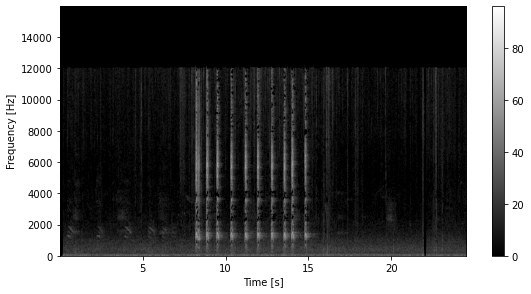

(<AxesSubplot:xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 582.405x301.95 with 2 Axes>)

In [9]:

s, fs = sound.load('audio_data/corvus_audio_file19.wav')

dB_max = 96

Sxx_power, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=1024//2)

Sxx_db = power2dB(Sxx_power) + dB_max
plot2d(Sxx_db, **{'vmin':0, 'vmax':dB_max, 'extent':ext})

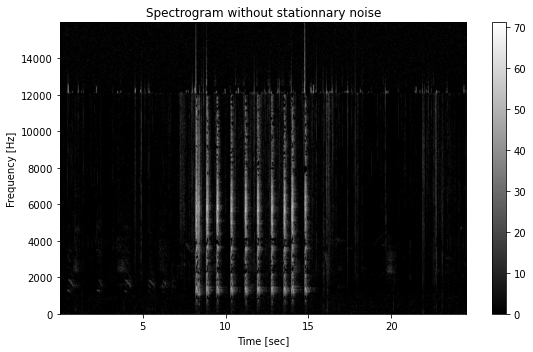

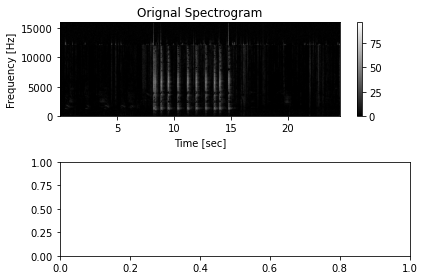

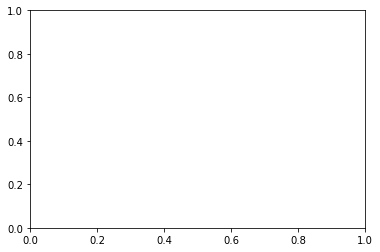

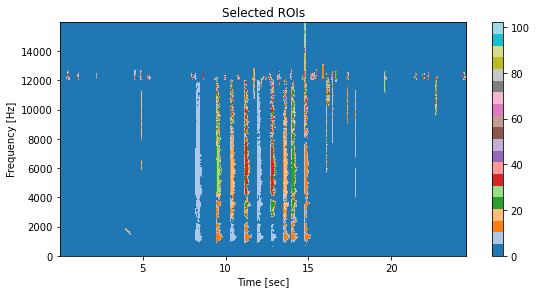

   labelID    label  min_y  min_x  max_y  max_x     min_f   min_t     max_f  \
0        1  unknown     15    510     26    518    468.75   8.176    812.50   
1        2  unknown     15    548    456    574    468.75   8.784  14250.00   
2        3  unknown     15    590     25    597    468.75   9.456    781.25   
3        4  unknown     15    872     25    881    468.75  13.968    781.25   
4        5  unknown     16    697     26    705    500.00  11.168    812.50   
..     ...      ...    ...    ...    ...    ...       ...     ...       ...   
73      88  unknown    387    620    394    623  12093.75   9.936  12312.50   
74      90  unknown    387    870    412    872  12093.75  13.936  12875.00   
75      92  unknown    387    990    418    992  12093.75  15.856  13062.50   
76      98  unknown    387   1336    398   1342  12093.75  21.392  12437.50   
77     102  unknown    388    962    410    966  12125.00  15.408  12812.50   

     max_t  centroid_y  centroid_x  duration_x  ban

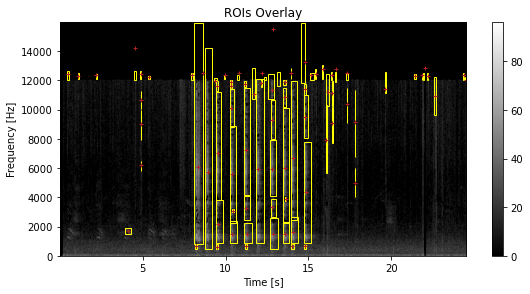

In [10]:
Sxx_power_noNoise= sound.median_equalizer(Sxx_power, display=True, **{'extent':ext})
Sxx_db_noNoise = power2dB(Sxx_power_noNoise)

Sxx_db_noNoise_smooth = sound.smooth(Sxx_db_noNoise, std=0.5,
                         display=True, savefig=None,
                         **{'vmin':0, 'vmax':dB_max, 'extent':ext})

im_mask = rois.create_mask(im=Sxx_db_noNoise_smooth, mode_bin ='relative',
                           bin_std=8, bin_per=0.5,
                           verbose=False, display=False)

im_rois, df_rois = rois.select_rois(im_mask, min_roi=25, max_roi=None,
                                 display= True,
                                 **{'extent':ext})

df_rois = format_features(df_rois, tn, fn)

ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':dB_max, 'extent':ext})

df_centroid = features.centroid_features(Sxx_db, df_rois, im_rois)

df_centroid = format_features(df_centroid, tn, fn)
pp.pprint(df_centroid)
ax0, fig0 = overlay_centroid(Sxx_db, df_centroid, savefig=None,
                             **{'vmin':0,'vmax':dB_max,'extent':ext,'ms':4,
                                'marker':'+', 'fig':fig0, 'ax':ax0})

In [4]:
df_centroid['area_xy'][0]



1988